## **i. Mount google drive**
---

In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **ii. Import the libraries**
---

In [45]:
import cv2
import sys
import os
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print("Versions of key libraries")
print("---")
print("cv2:       ", cv2.__version__)
print("numpy:     ", np.__version__)
print("matplotlib:", matplotlib.__version__)


Versions of key libraries
---
cv2:        4.1.2
numpy:      1.19.5
matplotlib: 3.2.2


## **iii. Append /iss/vse/data/ in your python path**
---

In [46]:
sys.path.append('/content/gdrive/My Drive/iss/vse/data/')
print("All the system paths:")
sys.path

All the system paths:


['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/iss/vse/data/',
 '/content/gdrive/My Drive/iss/vse/data/']

## **iv. Change working directory to /iss/vse/data/**
---

In [47]:
os.chdir('/content/gdrive/My Drive/iss/vse/data/')
print("Current working directory:")
os.getcwd()

Current working directory:


'/content/gdrive/My Drive/iss/vse/data'

## **v. Define `cv2plt` for image display**
---

In [48]:
def cv2plt(img):
    plt.figure(figsize=(7,7))        # To change the size of figure
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)  
    plt.show()

print(cv2plt)

<function cv2plt at 0x7fd65b3b6440>


## **Challenge**
---
From the lecture on image segmentation, we have seen the segmentation output by morphological snake on 'neu.jpg' is not ideal. Thresholding can produce pretty decent output, but in some cases, the middle part of a cell is excluded. <br><br>

In image processing and computer vision, generally the final solution consists of the use of multiple techniques to get the best outcome. Try to combine other techniques we have learned in these two days together with morphological snake to get the best segmentation for 'neu.jpg'. Write your code to achieve the below output.

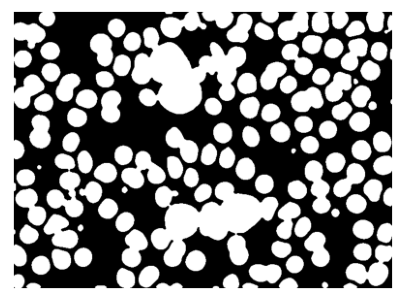

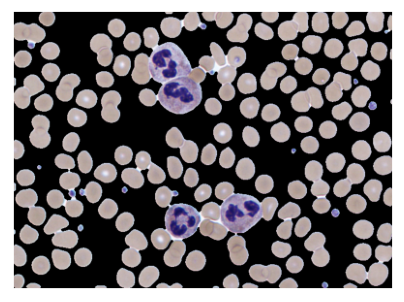

In [49]:
cv2plt(cv2.imread('neu-snake-better-mask.png'))
cv2plt(cv2.imread('neu-snake-better-iso.png'))

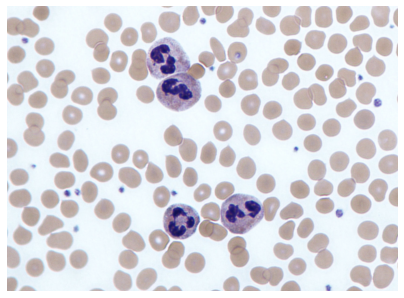

In [50]:
import morphsnakes as ms

neu    = cv2.imread('neu.jpg')
neu    = cv2.resize(neu,(728,530),interpolation=cv2.INTER_LINEAR)

cv2plt(neu)

How to create a mask for segmenting a given image:

1. Thresholding -
* Advantage - Captures all red blood cells in mask
* Disadvantage - red blood cells have holes in mask

2. Morphological Snake -
* Advantage - red blood cells don't have holes in mask
* Disadvantage - Doesn't capture all red blood cells in mask

3. Combination of Thresholding and Snake

# 1. Thresholding

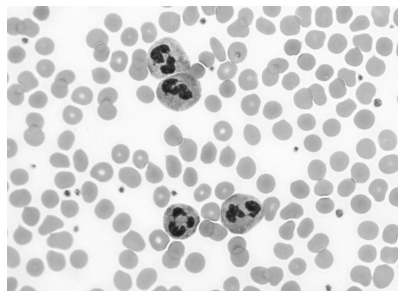

In [51]:
tr1 = cv2.cvtColor(neu,cv2.COLOR_BGR2GRAY)
cv2plt(tr1)

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.40000e+01,
        1.61000e+02, 3.26000e+02, 5.56000e+02, 6.96000e+02, 6.77000e+02,
        8.02000e+02, 4.57000e+02, 3.50000e+02, 2.64000e+02, 2.02000e+02,
        1.72000e+02, 1.66000e+02, 1.57000e+02, 1.34000e+02, 1.46000e+02,
        1.78000e+02, 1.90000e+02, 2.56000e+02, 3.77000e+02, 4.25000e+02,
        5.88000e+02, 7.94000e+02, 1.08200e+03, 1.32900e+03, 1.75500e+03,
        2.68500e+03, 4.05500e+03, 8.41100e+03, 1.57410e+04, 2.65370e+04,
        3.56590e+04, 3.10620e+04, 1.47180e+04, 7.19700e+03, 5.03900e+03,
        4.85500e+03, 3.63800e+03, 3.56300e+03, 3.57200e+03, 3.80100e+03,
        4.57300e+03, 8.81600e+03, 5.26730e+04, 1.20868e+05, 1.61030e+04]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
         91.8,  96.9, 102. , 107.1, 112.2, 117.3, 122.4, 127.5, 132.6,
        137.7, 142.8, 147.9, 153. , 158.1, 163.2, 168.3

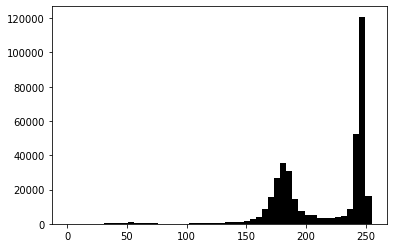

In [52]:
plt.hist(tr1.ravel(), 
 50, 
 [0,255], 
 facecolor= 'black')

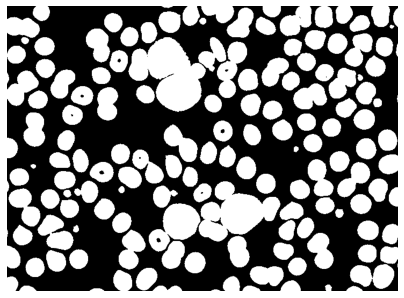

In [53]:
(_,tr2) = cv2.threshold(tr1,220 , 255, cv2.THRESH_BINARY_INV)
cv2plt(tr2)

# 2. Morphological Snake

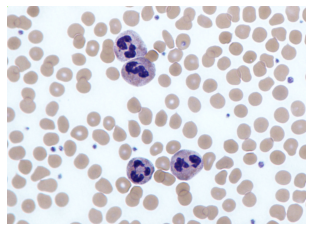

In [54]:
neug = cv2.cvtColor(neu,cv2.COLOR_BGR2GRAY)/255.0 
invg = ms.inverse_gaussian_gradient(neug, alpha=700, sigma=1) 
ls0 = ms.circle_level_set(neug.shape, (265, 364), 450) 
callback = ms.visual2d(cv2.cvtColor(neu,cv2.COLOR_BGR2RGB)) 
lsf = ms.morphological_geodesic_active_contour(invg, 
                                              iterations=400, 
                                              init_level_set=ls0, 
                                              smoothing=1, 
                                              threshold=0.5, 
                                              balloon=-1, 
                                              iter_callback=callback)

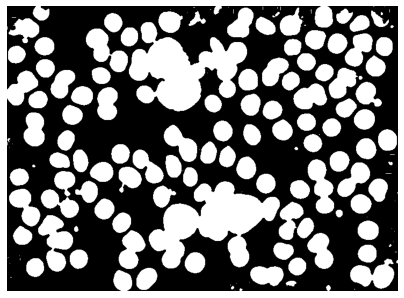

In [55]:
cv2plt(lsf*255)

In [56]:
kernel = np.ones((4,4),np.uint8)
final = cv2.morphologyEx(np.uint8(lsf), cv2.MORPH_OPEN, kernel)

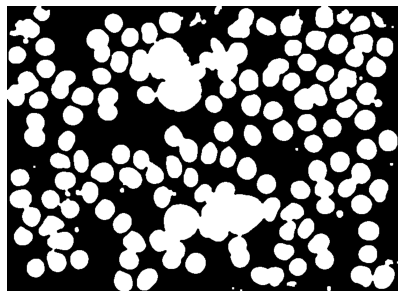

In [57]:
cv2plt(final*255)

# 3. Combination

In [58]:
mask1 = tr2.copy()
mask2 = final*255

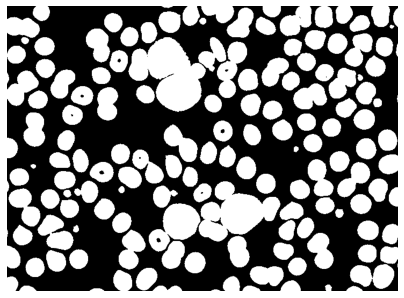

In [59]:
cv2plt(mask1)

In [60]:
np.unique(mask1)

array([  0, 255], dtype=uint8)

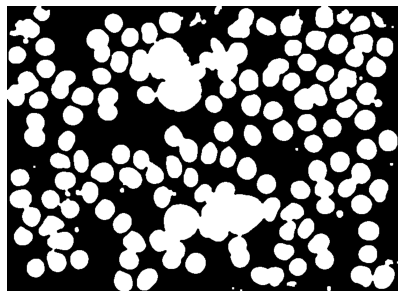

In [61]:
cv2plt(mask2)

In [62]:
np.unique(mask2)

array([  0, 255], dtype=uint8)

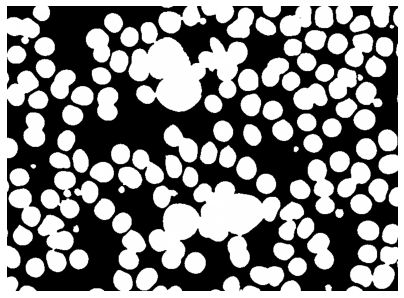

In [63]:
mask3=mask1+mask2
cv2plt(mask3)

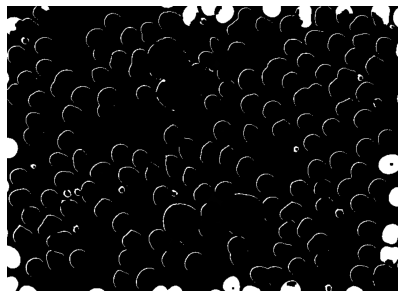

In [64]:
# white - white = black
# white - black = white (This will retain extra cells)
# black - white = black (This will retain holes)
# black - black = black
temp = mask1-mask2
cv2plt(temp)

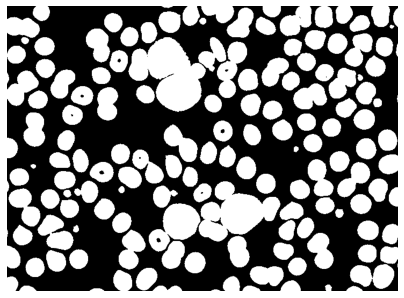

In [66]:
mask3=temp+mask2
cv2plt(mask3)

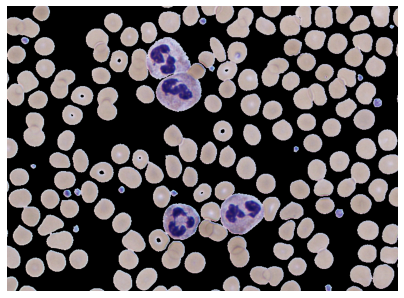

In [67]:
iso = cv2.bitwise_and(neu, 
                    neu, 
                    mask=np.uint8(mask3))
cv2plt(iso)